This is a PySR run on the molecular mass dataset with the division operator removed and the logarithm and exponential operators added. Iterations increased to 1000. Random numbers switched.

In [17]:
# Install libraries
%pip install -U pysr

Note: you may need to restart the kernel to use updated packages.


In [18]:
# Call Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from google.colab import drive
from pysr import PySRRegressor
import time
#import math
import sympy as sym

In [19]:
# Colab
#drive.mount('/content/drive')
#df=pd.read_csv('/content/drive/MyDrive/goossens_raw.csv')
# Positron
df=pd.read_csv('./goossens_raw.csv')
# Quarto
#df=pd.read_csv('./c694/goossens_raw.csv')

y=df['MW']
x=df[['SG','TBP']]

In [20]:
t0 = time.time()
# Add Log and Exp Functions
myMod=PySRRegressor(
    random_state=11,
    deterministic=True,
    parallelism='serial',
    binary_operators=["+","-","*"],
    unary_operators=["exp","log"],
    niterations=1000)
myMod.fit(x,y)
y_pred=myMod.predict(x)
print("time to fit: ",time.time() - t0, 'seconds')

/home/richard/Documents/p312a/lib/python3.12/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 2.520e+05
Progress: 1122 / 31000 total iterations (3.619%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           9.627e+04  0.000e+00  y = 304.55
3           2.941e+04  5.897e-01  y = TBP - 270.62
5           2.347e+04  1.116e-01  y = (TBP * 1.3999) - 500.62
6           1.658e+04  3.446e-01  y = TBP * (log(TBP) + -5.8922)
7           7.214e+03  8.313e-01  y = ((1.1829e-06 * TBP) * TBP) * TBP
9           6.138e+03  8.050e-02  y = (TBP * ((TBP * 0.0032561) + -2.6519)) - -631.68
11          4.928e+03  1.095e-01  y = ((TBP + -502.26) * ((TBP * TBP) * 2.2773e-06)) + 138.0...
                                      3
13          2.105e+03  4.250e-01  y = (((TBP * 2.2244e-06) * TBP) * (TBP + (SG * -497.23))) ...
                                      + 94.722
15 

[ Info: Final population:
[ Info: Results saved to:


time to fit:  135.82664799690247 seconds
  - outputs/20250724_160256_9u8IzT/hall_of_fame.csv


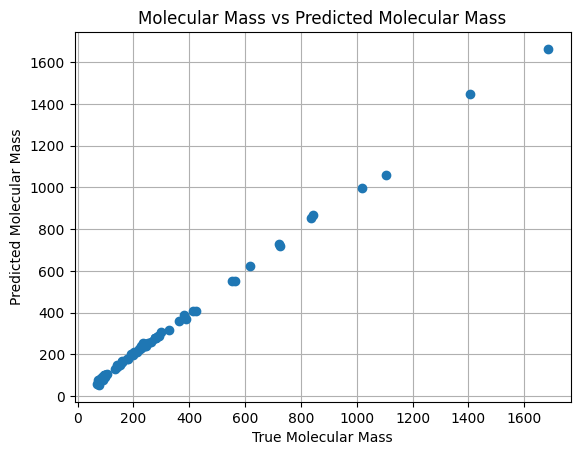

In [21]:
plt.plot(y,y_pred,marker="o",linestyle="None")
plt.xlabel('True Molecular Mass')
plt.ylabel('Predicted Molecular Mass')
plt.title('Molecular Mass vs Predicted Molecular Mass')
plt.grid()
plt.show()

In [22]:
# Pull Out Equation
myEq=myMod.sympy()
# Clean-Up Equation
sym.simplify(myEq)

-208.49345*SG + exp(-SG**2 + log(TBP)**2)/TBP**5.7967854 + 0.6740138*TBP**1.0

In [23]:
print(myMod)

PySRRegressor.equations_ = [
	    pick     score                                           equation          loss  complexity
	0         0.000000                                          304.55478  96270.340000           1
	1         0.592876                                    TBP - 270.62198  29412.145000           3
	2         0.443028                            exp(TBP * 0.0073274574)  18885.219000           4
	3         0.016186                         TBP * (TBP * 0.0009359772)  18582.010000           5
	4         1.549157                exp((TBP * 0.004575491) + 2.640126)   3947.320000           6
	5         0.886483        exp(((TBP * 0.0045754914) + 3.559349) - SG)    670.367700           8
	6         0.034848  exp(2.5490043 + ((TBP * 0.0045754914) - log(SG)))    647.409100           9
	7         0.083702  exp((3.7070484 + (TBP * 0.0045754914)) - (SG *...    595.425700          10
	8         0.097229  exp(((TBP * 0.0048775324) - (SG * 1.0890131)) ...    490.202900          12
	

In [24]:
# Load Hosseinifar dataset
# Colab
#drive.mount('/content/drive')
#df=pd.read_csv('/content/drive/MyDrive/hosseinifar_raw.csv')
# Positron
dfh=pd.read_csv('./hosseinifar_raw.csv')
# Quarto
#df=pd.read_csv('./c694/hosseinifar_raw.csv')

yh=dfh['MW']
xh=dfh[['SG','TBP']]

In [25]:
t0 = time.time()
# Re-Run with new random seed
urMod=PySRRegressor(
    random_state=7,
    deterministic=True,
    parallelism='serial',
    binary_operators=["+","-","*"],
    unary_operators=["exp","log"],
    timeout_in_seconds=1000)
#    niterations=1000,
urMod.fit(x,y)
z_pred=urMod.predict(x)
print("time to fit: ",time.time() - t0, 'seconds')

/home/richard/Documents/p312a/lib/python3.12/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 2.820e+05
Progress: 1034 / 3100 total iterations (33.355%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           9.627e+04  0.000e+00  y = 304.55
3           2.941e+04  5.897e-01  y = TBP + -270.61
5           1.858e+04  2.281e-01  y = (TBP * 0.00093598) * TBP
6           1.658e+04  1.115e-01  y = TBP * (log(TBP) + -5.8922)
7           1.090e+04  4.186e-01  y = ((TBP * 0.0016541) + -0.54181) * TBP
9           6.138e+03  2.865e-01  y = (TBP * ((TBP * 0.0032561) + -2.6518)) + 631.67
11          4.551e+03  1.493e-01  y = ((TBP * TBP) * 1.7955e-06) * ((SG * -310.59) + TBP)
13          2.102e+03  3.859e-01  y = ((TBP * 2.235e-06) * ((TBP + (SG * -502.32)) * TBP)) +...
                                       98.301
15          1.766e+03  8.715e-02  y = (((TBP 

[ Info: Final population:
[ Info: Results saved to:



Expressions evaluated per second: 2.970e+05
Progress: 2014 / 3100 total iterations (64.968%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           9.627e+04  0.000e+00  y = 304.55
3           2.941e+04  5.897e-01  y = TBP + -270.61
5           1.858e+04  2.281e-01  y = (TBP * TBP) * 0.00093598
6           1.658e+04  1.115e-01  y = TBP * (log(TBP) + -5.8922)
7           7.214e+03  8.313e-01  y = ((TBP * TBP) * 1.1819e-06) * TBP
9           6.138e+03  8.049e-02  y = (TBP * ((TBP * 0.0032561) + -2.6518)) + 631.67
11          4.540e+03  1.504e-01  y = (TBP + (SG * -318.9)) * ((TBP * 1.8307e-06) * TBP)
12          4.190e+03  7.978e-02  y = (((TBP * (TBP * 1.2477e-06)) - log(SG)) * TBP) - 100.4...
                                      5
13          2.102e+03  6.893e-01  y = (((SG * -501.92) +

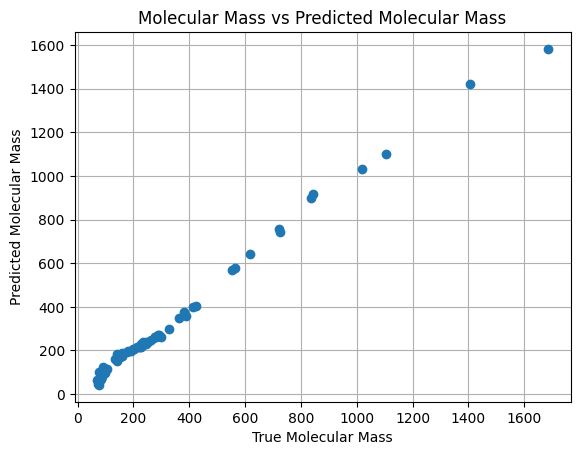

In [26]:
# Replot with new predictions
plt.plot(y,z_pred,marker="o",linestyle="None")
plt.xlabel('True Molecular Mass')
plt.ylabel('Predicted Molecular Mass')
plt.title('Molecular Mass vs Predicted Molecular Mass')
plt.grid()
plt.show()

In [27]:
# Pull Out New Equation
urEq=urMod.sympy()
# Clean-Up Equation
sym.simplify(urEq)

-(0.0038011975*TBP - 1.02352207051435)*((TBP - 492.23026)*(-0.0020865065*TBP + log(SG) + 1.60135630682339) - 208.1731)

In [28]:
# Add New Predictions to training Dataframe
df['Fit_Mw_11']=y_pred
df['Fit_Mw_7']=z_pred
# Calculate Correlation Coefficient between columns
df.corr()

,SG,TBP,MW,Fit_Mw_11,Fit_Mw_7
SG,1.000000,0.625218,0.334852,0.331159,0.344175
TBP,0.625218,1.000000,0.869591,0.870264,0.872532
MW,0.334852,0.869591,1.000000,0.999324,0.997072
Fit_Mw_11,0.331159,0.870264,0.999324,1.000000,0.997365
Fit_Mw_7,0.344175,0.872532,0.997072,0.997365,1.000000


In [29]:
# Print (Old) Equation before clean-up
print(myEq)

-208.49345*SG + 0.6740138*TBP + exp(-SG**2 + (log(TBP) - 5.7967854)*log(TBP))


In [30]:
# Generate testing Predictions
y_h1=myMod.predict(xh)
y_h2=urMod.predict(xh)

In [31]:
# Add Predictions to testing Dataframe
dfh['Fit_Mw_11']=y_h1
dfh['Fit_Mw_7']=y_h2
# Calculate Correlation Coefficient between columns
dfh.corr()

,SG,TBP,MW,Fit_Mw_11,Fit_Mw_7
SG,1.000000,0.985561,0.954145,0.956396,0.957559
TBP,0.985561,1.000000,0.990235,0.991440,0.990434
MW,0.954145,0.990235,1.000000,0.999921,0.999003
Fit_Mw_11,0.956396,0.991440,0.999921,1.000000,0.999050
Fit_Mw_7,0.957559,0.990434,0.999003,0.999050,1.000000
